In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

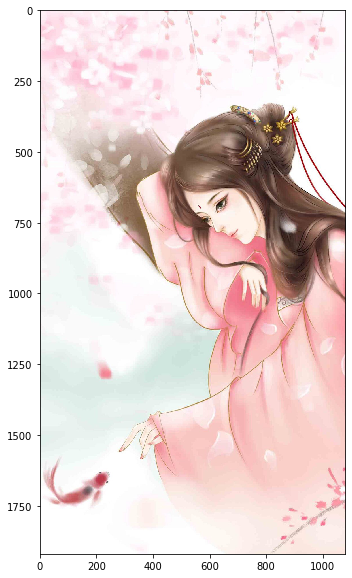

In [2]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img)
plt.show()

<div class="alert alert-block alert-success"> 
  <b>Sobel算子是高斯平滑与微分操作的几何体，他对抗噪声的能力很好！
      </b>!
</div>

<div class="alert alert-block alert-success"> 
  <b>
      图像中的边缘区域，像素值会发生“跳跃”，对这些像素求导，那些位于边缘处的像素的一阶导数值，在所有像素的一阶导数中处于极值状态，这就是Sobel算子使用的原理——极值处就是边缘</b>!
</div>

### Sobel和Scharr滤波器

#### cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
+ src:
+ ddepth:图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度。
<div class="alert alert-block alert-info">   
<b>Sobel函数求完导数后会有负值，还有会大于255的值。而原图像是uint8，即8位无符号数，所以Sobel建立的图像位数不够，会有截断。因此要使用16位有符号的数据类型，即cv2.CV_16S</b>!
</div>
+ dx:求导的阶数，0表示这个方向上不求导，一般为0、1、2
+ dy:求导的阶数，0表示这个方向上不求导，一般为0、1、2
+ ksize:Sobel算子的大小，必须为1、3、5、7【当ksize置为-1时默认使用3x3的Scharr滤波器，它的效果要比3x3的sobel滤波器要好，因此再使用3x3的滤波器时应该尽可能的使用Scharr滤波器】
+ scale:缩放导数的比例常数，默认情况下没有伸缩系数（learning rate的感觉）
+ delta:一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中
+ borderType:判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT

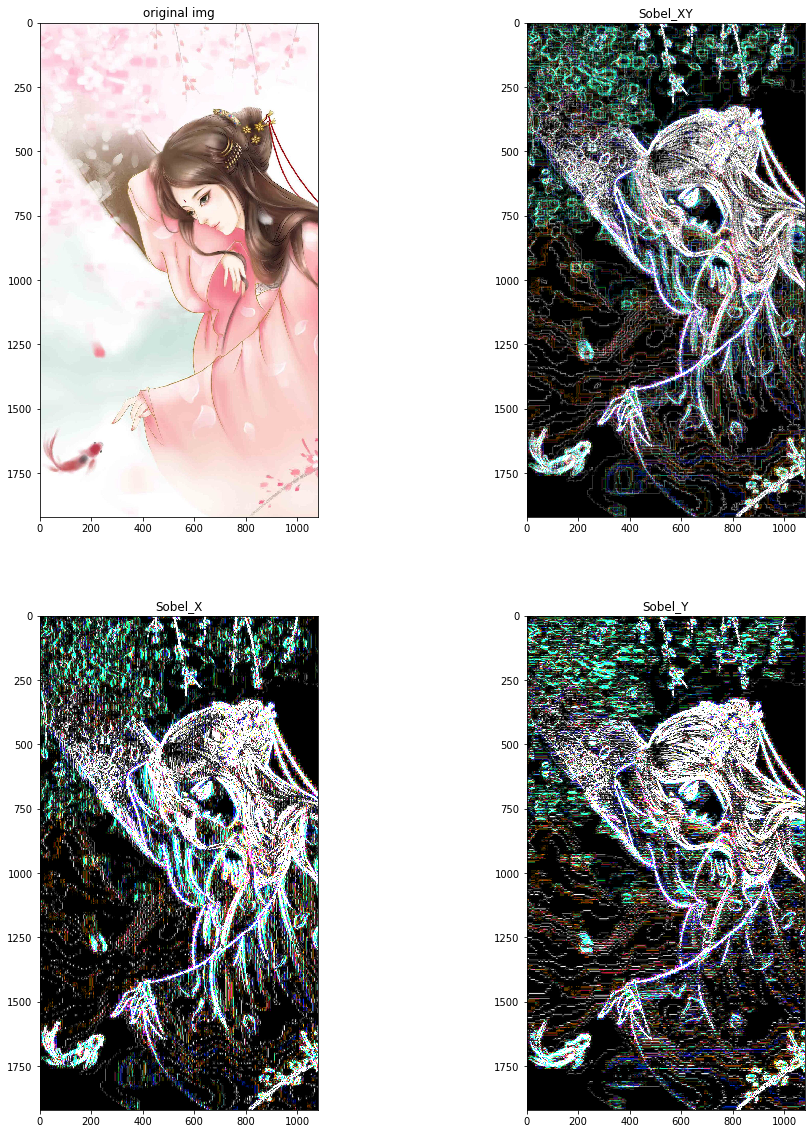

In [19]:
# 只在水平方向上求一阶导数
img_sobel_x = cv2.Sobel(src=img, ddepth=cv2.CV_16S, dx=1, dy=0, ksize=5)
# 将图像转换为uint8形式
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 只在垂直方向上求一阶导数
img_sobel_y = cv2.Sobel(src=img, ddepth=cv2.CV_16S, dx=0, dy=1, ksize=5)
# 将图像转换到uint8格式
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# 将水平方向和垂直方向上的结果放到一起
img_sobel_xy = cv2.addWeighted(src1=img_sobel_x, alpha=0.5, src2=img_sobel_y, beta=0.5, gamma=0)

fig, axes = plt.subplots(2, 2, figsize=[16, 20])
axes = axes.flatten()
axes[0].imshow(img)
axes[0].set_title('original img')
axes[1].imshow(img_sobel_xy, cmap='gray')
axes[1].set_title('Sobel_XY')
axes[2].imshow(img_sobel_x, cmap='gray')
axes[2].set_title('Sobel_X')
axes[3].imshow(img_sobel_y, cmap='gray')
axes[3].set_title('Sobel_Y')
plt.show()

In [14]:
img_sobel.min(), img_sobel.max()

(0, 255)

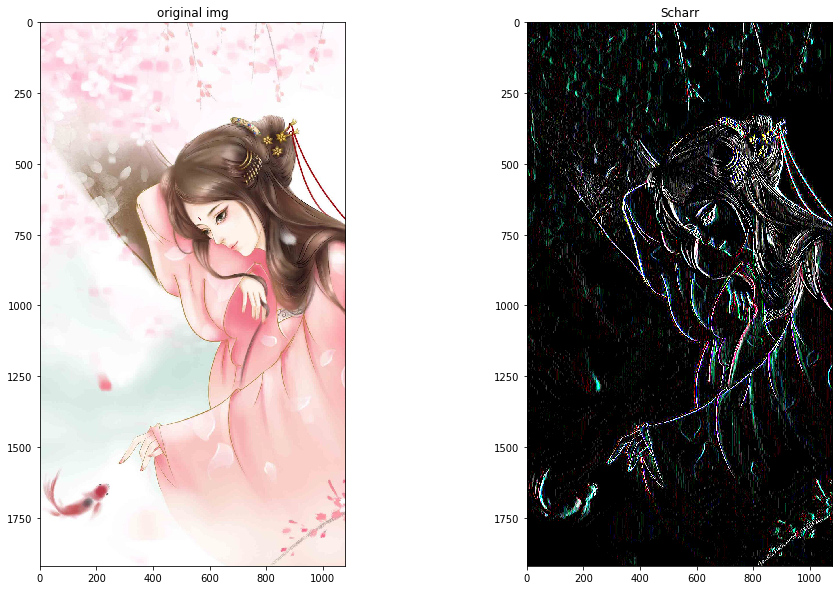

In [8]:
# 只在水平方向上求一阶导数
img_sobel = cv2.Sobel(src=img, ddepth=-1, dx=1, dy=0, ksize=-1)

fig, axes = plt.subplots(1, 2, figsize=[16, 10])
axes[0].imshow(img)
axes[0].set_title('original img')
axes[1].imshow(img_sobel)
axes[1].set_title('Scharr')
plt.show()

### Laplacian滤波器
<div class="alert alert-block alert-success"> 
  <b>如果对像素值求二阶导数，边缘处的像素其二阶导数导数值为0，Laplace函数实现的方法是先用Sobel算子计算二阶x和y导数，再求和</b>!
</div>

#### cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])

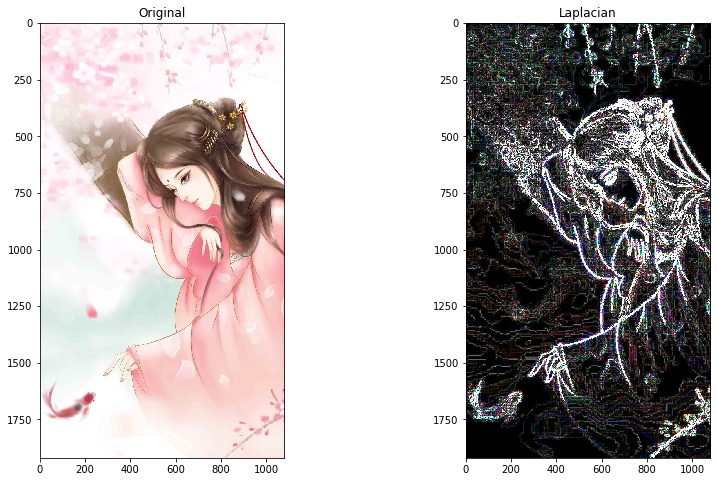

In [26]:
img_lap = cv2.Laplacian(src=img, ddepth=cv2.CV_16S, ksize=5)
img_lap = cv2.convertScaleAbs(img_lap)

fig, axes = plt.subplots(1, 2, figsize=[14, 8])
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(img_lap)
axes[1].set_title('Laplacian')
plt.show()